<a href="https://colab.research.google.com/github/nadyaloseva/Course_of_ML_itmo/blob/principal_components_method/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
X = pd.read_csv('13_36.csv', names=['1','2','3','4','5','6','7','8','9','10'])

In [ ]:
# Создаем объект PCA с указанным параметром svd_solver
pca = PCA(svd_solver='full')

In [ ]:
# Применяем PCA к данным
pca.fit(X)

PCA(svd_solver='full')

In [ ]:
# Преобразуем данные в новые координаты
transformed_data = pca.transform(X)

In [ ]:
# Преобразуем в DataFrame для удобства
transformed_df = pd.DataFrame(transformed_data, columns=[f'PC_{i+1}' for i in range(transformed_data.shape[1])])

In [ ]:
# Получаем координату первого объекта относительно первой главной компоненты
transformed_data[0, 0]

2.4927954273871658

In [ ]:
# Получаем координату первого объекта относительно второй главной компоненты
transformed_data[0, 1]

34.21521225471357

In [ ]:
# Получаем долю объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_

# Суммируем доли объясненной дисперсии для первых двух главных компонент
np.sum(explained_variance_ratio[:2])

0.6066436226952218

In [ ]:
# Получаем долю объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_

# Суммируем доли объясненной дисперсии и находим минимальное количество компонент
cumulative_variance = np.cumsum(explained_variance_ratio)
min_components = np.argmax(cumulative_variance > 0.85) + 1  # +1 для индексации

print(f"Минимальное количество главных компонент для объясненной дисперсии более 0.85: {min_components}")

Минимальное количество главных компонент для объясненной дисперсии более 0.85: 4


Количество выделенных групп объектов: 3


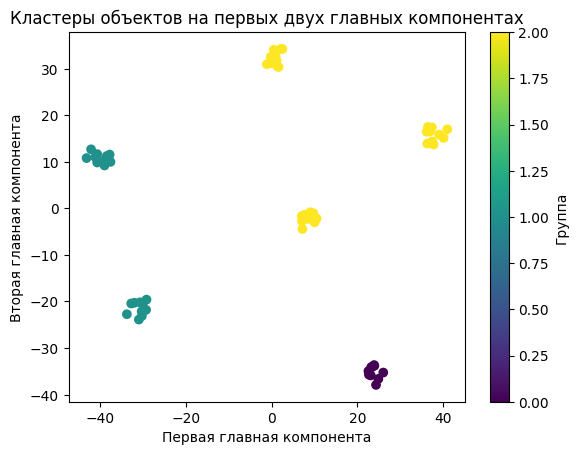

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Создаем объект PCA с указанным параметром svd_solver
pca = PCA(n_components=2, svd_solver='full')

# Применяем PCA к данным
transformed_data = pca.fit_transform(X)

# Применяем метод K-средние
# Здесь можно варьировать количество кластеров
kmeans = KMeans(n_clusters=3)  # Например, 3 кластера
kmeans.fit(transformed_data)
labels = kmeans.labels_

# Выводим количество групп (кластеров)
unique_labels = np.unique(labels)
num_clusters = len(unique_labels)

print(f"Количество выделенных групп объектов: {num_clusters}")

# Визуализация результатов
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Кластеры объектов на первых двух главных компонентах')
plt.colorbar(label='Группа')
plt.show()